##### Load the Dataset

In [39]:
# Load libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import set_option, read_csv
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix, scatter_plot

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier


In [40]:
dataset_df = pd.read_csv('sonar.all-data.csv', header=None)
dataset_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R


##### Analyze Data
    Let’s take a closer look at our loaded data using descriptive statistics 

In [41]:
#shape of dataset
dataset_df.shape

(208, 61)

In [42]:
# types
set_option('display.max_row', 5)
(dataset_df.dtypes)

0     float64
1     float64
       ...   
59    float64
60     object
dtype: object

In [43]:
# head
set_option( 'display.width', 100)
(dataset_df.head(3))

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R


In [44]:
# descriptions, change precision to 3 places
set_option('precision', 3)
set_option('display.max_row', 8)
(dataset_df.describe())

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [45]:
#dataset_df.info()

In [46]:
#class distributions
print dataset_df.groupby(60).size()

60
M    111
R     97
dtype: int64


Output of the class breakdown of the dataset.
We can see that the classes are resonably balanced between M(mines) and R(rocks)

**Unimodal Data Visualizations**

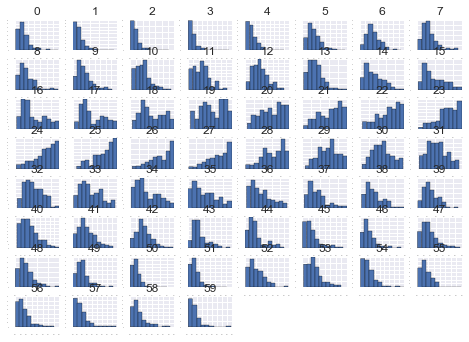

In [22]:
#histograms
dataset_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

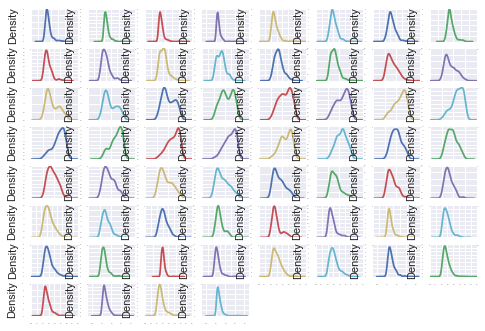

In [23]:
# density
dataset_df.plot(kind = 'density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

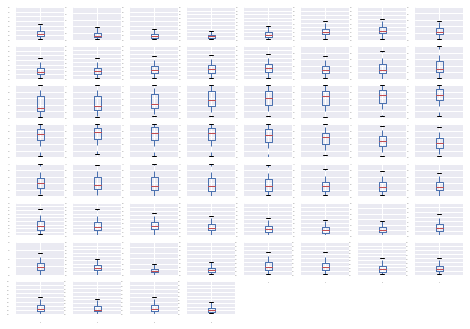

In [24]:
#box and whisker plot
dataset_df.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1)
plt.show()

We can see that attributes do have quite different spreads. Given the scales are the same, it may suggest some benefit in standardizing the data for modeling to get all of the means lined up.

**Multimodal Data Visualizations**<br>
Let’s visualize the correlations between the attributes.

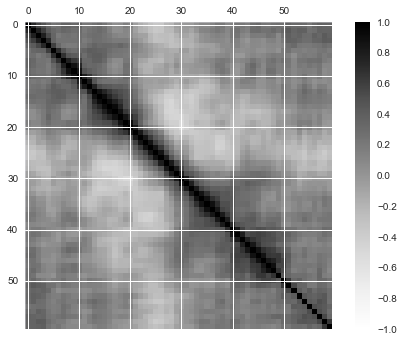

In [26]:
#correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [27]:
dataset_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000,0.736,0.572,0.491,0.345,0.239,0.261,0.356,0.353,0.318,...,0.254,0.355,0.312,0.322,0.312,0.221,0.314,0.368,0.357,0.347
1,0.736,1.000,0.780,0.607,0.420,0.332,0.279,0.335,0.317,0.271,...,0.321,0.435,0.346,0.384,0.380,0.262,0.280,0.353,0.352,0.359
2,0.572,0.780,1.000,0.782,0.546,0.346,0.190,0.238,0.253,0.220,...,0.238,0.394,0.333,0.367,0.290,0.288,0.381,0.334,0.425,0.374
3,0.491,0.607,0.782,1.000,0.727,0.353,0.246,0.247,0.247,0.238,...,0.175,0.375,0.365,0.334,0.285,0.281,0.340,0.345,0.420,0.401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.314,0.280,0.381,0.340,0.219,0.161,0.186,0.267,0.194,0.140,...,0.191,0.191,0.308,0.361,0.387,0.515,1.000,0.510,0.431,0.287
57,0.368,0.353,0.334,0.345,0.239,0.204,0.243,0.288,0.232,0.212,...,0.326,0.310,0.371,0.404,0.503,0.464,0.510,1.000,0.550,0.330
58,0.357,0.352,0.425,0.420,0.291,0.221,0.184,0.194,0.097,0.058,...,0.318,0.299,0.346,0.447,0.454,0.431,0.431,0.550,1.000,0.643
59,0.347,0.359,0.374,0.401,0.254,0.178,0.222,0.146,0.095,0.097,...,0.247,0.195,0.281,0.283,0.264,0.349,0.287,0.330,0.643,1.000


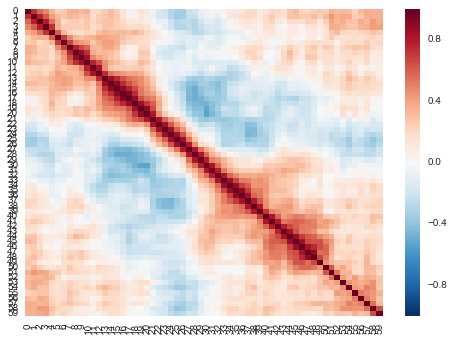

In [28]:
sns.heatmap(dataset_df.corr())

##### Validation Dataset 
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [34]:
#split-out validation dataset
array = dataset_df.values
X = array[:, :60].astype(float)
Y = array[:, 60]

validation_size = .20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = validation_size, random_state=seed)


**Evaluate Algorithms: Baseline**
We don’t know what algorithms will do well on this dataset. Gut feel suggests distance based algorithms like k Nearest Neighbors and Support Vector Machines may do well. Let’s design our test harness. We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the _accuracy_ metric. This is a gross metric that will give a quick idea of how correct a given model is. More useful on binary classification problems like this one.

In [35]:
#Test options and evaluation metrics
num_folds = 10
seed = 7
scoring ='accuracy'

Let’s create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this classification
problem. The six algorithms selected include:
1. Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
2. Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [53]:
# Spot-Check Algorithms
#Prepare Algorithms to Evaluate.

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(( 'SVM', SVC()))
#print models

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will display the mean and standard deviation of accuracy for each algorithm as we calculate it and collect the results for use later.

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will display the mean and standard deviation of accuracy for each algorithm as we calculate it and collect the results for use later.

In [55]:
# Evaluate Algorithms using the test harness

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print msg

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.734926 (0.110642)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


Running the example provides the output below. The results suggest That both _Logistic Regression_ and _k-Nearest Neighbors_ may be worth further study.

These are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross validation folds. We can do that graphically using box and whisker
plots.

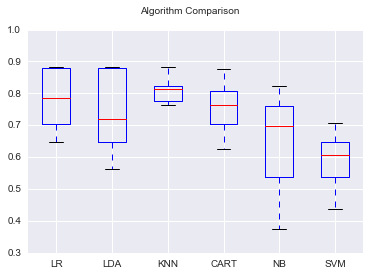

In [57]:
#Compare algorithms
# visualizations of the distribution of algorithm performance

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results show a tight distribution for KNN which is encouraging, suggesting low variance. The poor results for SVM are surprising.

It is possible that the varied distribution of the attributes is having an effect on the accuracy of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized copy of the training dataset.

##### Evaluate Algorithms: Standardize Data

In [61]:
#standarize the dataset
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.717279 (0.079881)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


Running the example provides the results listed below. We can see that KNN is still doing well, even better than before. We can also see that the standardization of the data has lifted
the skill of SVM to be the most accurate algorithm tested so far.

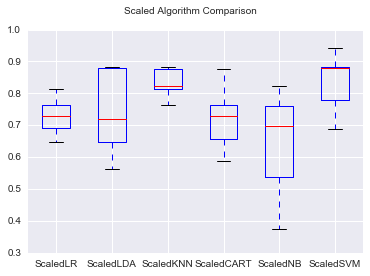

In [62]:
# Compare Algorithms
#Again, we should plot the distribution of the accuracy scores using box and whisker plots.

fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest digging deeper into the SVM and KNN algorithms. It is very likely that configuration beyond the default may yield even more accurate models.

##### Algorithm Tuning

We can start off by tuning the number of neighbors for KNN. The default number of neighbors is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value
is evaluated using 10-fold cross validation on the training standardized dataset.

**Tuning KNN**<br>
We can start off by tuning the number of neighbors for KNN. The default number of neighbors is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value is evaluated using 10-fold cross validation on the training standardized dataset


In [64]:
# Tune scaled KNN

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print ("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdv, param in zip(means, stds, params):
    print ("%f (%f) with %r" %(mean, stdv, param))

Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.059881) with {'n_neighbors': 1}
0.837349 (0.066303) with {'n_neighbors': 3}
0.837349 (0.037500) with {'n_neighbors': 5}
0.765060 (0.089510) with {'n_neighbors': 7}
0.753012 (0.086979) with {'n_neighbors': 9}
0.734940 (0.104890) with {'n_neighbors': 11}
0.734940 (0.105836) with {'n_neighbors': 13}
0.728916 (0.075873) with {'n_neighbors': 15}
0.710843 (0.078716) with {'n_neighbors': 17}
0.722892 (0.084555) with {'n_neighbors': 19}
0.710843 (0.108829) with {'n_neighbors': 21}


We can see that the optimal configuration is K=1. This is interesting as the algorithm will
make predictions using the most similar instance in the training dataset alone.

**Tuning SVM**<br>
We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the
margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial
Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid
search using 10-fold cross validation with a standardized copy of the training dataset. We will
try a number of simpler kernel types and C values with less bias and more bias (less than and
more than 1.0 respectively)

In [68]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear','poly','rbf','sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867470 using {'kernel': 'rbf', 'C': 1.5}
0.759036 (0.098863) with: {'kernel': 'linear', 'C': 0.1}
0.530120 (0.118780) with: {'kernel': 'poly', 'C': 0.1}
0.572289 (0.130339) with: {'kernel': 'rbf', 'C': 0.1}
0.704819 (0.066360) with: {'kernel': 'sigmoid', 'C': 0.1}
0.746988 (0.108913) with: {'kernel': 'linear', 'C': 0.3}
0.644578 (0.132290) with: {'kernel': 'poly', 'C': 0.3}
0.765060 (0.092312) with: {'kernel': 'rbf', 'C': 0.3}
0.734940 (0.054631) with: {'kernel': 'sigmoid', 'C': 0.3}
0.740964 (0.083035) with: {'kernel': 'linear', 'C': 0.5}
0.680723 (0.098638) with: {'kernel': 'poly', 'C': 0.5}
0.789157 (0.064316) with: {'kernel': 'rbf', 'C': 0.5}
0.746988 (0.059265) with: {'kernel': 'sigmoid', 'C': 0.5}
0.746988 (0.084525) with: {'kernel': 'linear', 'C': 0.7}
0.740964 (0.127960) with: {'kernel': 'poly', 'C': 0.7}
0.813253 (0.084886) with: {'kernel': 'rbf', 'C': 0.7}
0.753012 (0.058513) with: {'kernel': 'sigmoid', 'C': 0.7}
0.759036 (0.096940) with: {'kernel': 'linear', 'C': 0.9

Results of Tuning SVM on the Scaled Dataset.<br>
We can see the most accurate configuration was SVM with an RBF kernel and a C value of 1.5. The accuracy 86.7470% is seemingly better than what KNN could achieve.

##### Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:<br>
1. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).<br>
2. Bagging Methods: Random Forests (RF) and Extra Trees (ET).

We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are
less sensitive to data distributions.

In [70]:
#ensemble

ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print (msg)


AB: 0.813971 (0.066017)
GBM: 0.847794 (0.100189)
RF: 0.734191 (0.129723)
ET: 0.740074 (0.082094)


We can see that both boosting techniques provide strong accuracy scores in the low 80s (%)
with default configurations. We can plot the distribution of accuracy scores across the cross
validation folds.

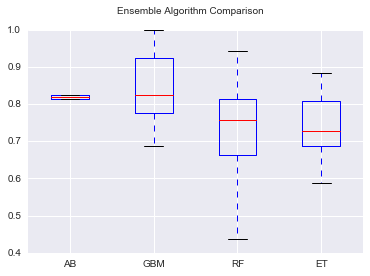

In [72]:
# Compare Algorithms
#Visualize the Distribution of Ensemble Algorithm Performance.

fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest GBM may be worthy of further study, with a strong mean and a spread that skews up towards high 90s (%) in accuracy.

##### Finalize Model

The SVM showed the most promise as a low complexity and stable model for this problem. In this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. A part of the findings was that SVM performs better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.

In [77]:
#prepare the model
#Evaluate SVM on the Validation Dataset.

scaler =StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)

#estimate accuracy on validation dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)

print (accuracy_score(Y_test, predictions))
print (confusion_matrix(Y_test, predictions))
print (classification_report(Y_test, predictions))


0.857142857143
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



We can see that we achieve an accuracy of nearly 86% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of SVM.

##### Summary

This is a end-to-end classification predictive modeling machine learning problem using python.The steps are:
    
1. Problem Definition (Sonar return data).
2. Loading the Dataset.
3. Analyze Data (same scale but different distributions of data).
4. Evaluate Algorithms (KNN looked good).
5. Evaluate Algorithms with Standardization (KNN and SVM looked good).
6. Algorithm Tuning (K=1 for KNN was good, SVM with an RBF kernel and C=1.5 was best).
7. Ensemble Methods (Bagging and Boosting, not quite as good as SVM).
8. Finalize Model (use all training data and confirm using validation dataset).
